# Etude de la relation entre la taille des joueurs et l'accuracy du heading.

## I - Description du Problème

Le heading veut dire une frappe avec la tête. On pourrait penser qu'un joueur qui est plus grand a tendante à réussir de plus ses frappes avec sa tête. Est-ce que cette hypothèse est correcte?

## II - Préparation des données

In [13]:
#imports utiles
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math

In [14]:
#Lecture des tables nécessaires pour l'analyse de notre problématique
playerattributes = pd.DataFrame(data=pd.read_csv("./donnees_soccer/playerattributes.csv", sep=","))
players=pd.DataFrame(data=pd.read_csv("./donnees_soccer/player.csv", sep=","))
players_id = np.unique(playerattributes[["player_api_id"]])

## III - Protocole expérimentale et Code

In [15]:
x = []
y = []
for pl in players_id:
    player_att1=playerattributes[playerattributes.player_api_id==pl]
    player_att2=players[players.player_api_id==pl]
    x.append((player_att2["height"].values)[0])
    #On prend la valeur du headding_accuracy la plus récente dans la table pour le joueur concerné
    y.append((player_att1.sort_values(by = 'date', ascending = False)[:1]["heading_accuracy"].values)[0])
#je remplace les nan par  la moeyenne
m=np.nanmean((players["height"]))
x=[m if math.isnan(i) else i for i in x]
y=[50 if math.isnan(i) else i for i in y] 

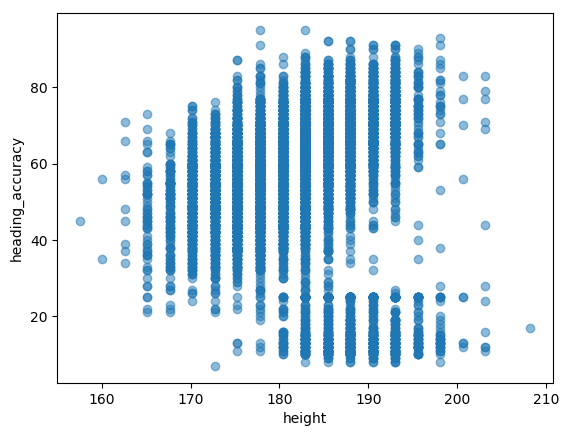

Le coefficient de correlation est =  0.07979499461387499


In [16]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.set_xlabel("height")
ax.set_ylabel("heading_accuracy")
plt.scatter(x, y, alpha=0.5)
plt.show()
print("Le coefficient de correlation est = ",np.corrcoef(x, y)[1,0])

## IV - Résultats et Conclusion

On constate clairement, avec le coeff de corrélation égale à 0.07, que la taille du joueur, contrairement à ce que l'on pourrait penser, n'a rien avoir avec les coups positifs que joue le joueur avec la tête